# Zadanie_2

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd

In [4]:
train_df = pd.read_csv("./train.csv")

X_train = train_df[["x1", "x2"]]
y_train = train_df["t"]

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
test_df = pd.read_csv("./test.csv")

X_test = test_df[["x1", "x2"]]
y_test = test_df["t"]

y_prediction = model.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


### Macierz pomyłek

In [17]:
confusion_matrix(y_test, y_prediction)

array([[96,  2],
       [ 5, 97]])

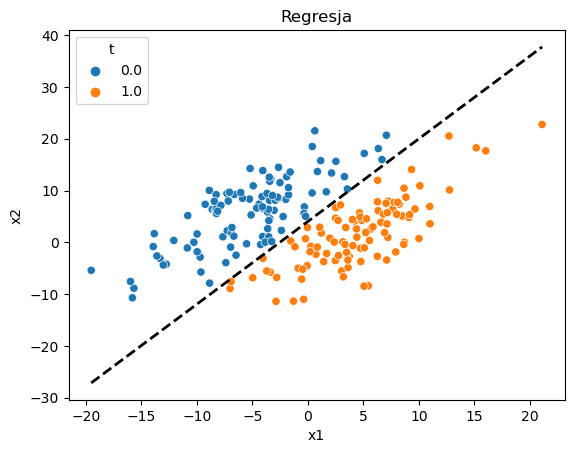

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

test_df['t'] = y_prediction

sns.scatterplot(x="x1", y="x2", hue="t", data=test_df)
plt.title("Regresja")

coef = model.coef_[0]
intercept = model.intercept_

slope = -coef[0] / coef[1]
intercept = -intercept / coef[1]

x_decision_boundary = np.linspace(test_df['x1'].min(), test_df['x1'].max(), 100)

y_decision_boundary = slope * x_decision_boundary + intercept

plt.plot(x_decision_boundary, y_decision_boundary, color='black', linestyle='--', linewidth=2)

plt.show()

# Zadanie_3

In [9]:
import tensorflow as tf
from tensorflow import keras

2023-09-29 09:31:34.734414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, verbose=0) 

2023-09-29 09:31:37.129169: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
%%capture
import numpy as np

def predict_class(x, y):
    features = np.array([[x, y]])
    prediction = model.predict(features)
    return int(prediction > 0.5)

x_min, x_max = test_df['x1'].min(), test_df['x1'].max()
y_min, y_max = test_df['x2'].min(), test_df['x2'].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = np.array([predict_class(x, y) for x, y in np.c_[xx.ravel(), yy.ravel()]])

2023-09-29 09:46:18.439046: W tensorflow/core/data/root_dataset.cc:273] Optimization loop failed: CANCELLED: Operation was cancelled


### Macierz pomyłek

In [16]:
confusion_matrix(y_test, (model.predict(X_test) > 0.5).astype("int32"))

7/7 [==============================] - 0s 12ms/step


array([[96,  2],
       [ 5, 97]])

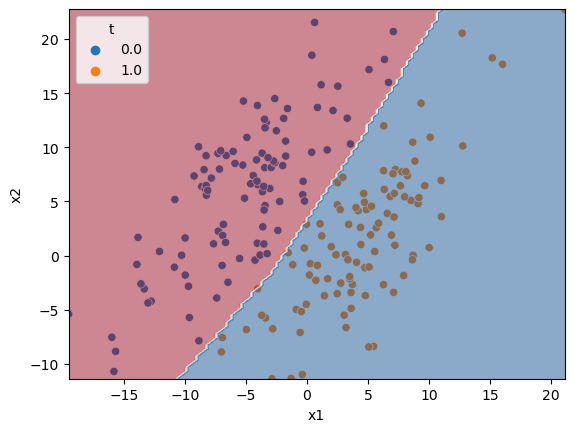

In [12]:
sns.scatterplot(x='x1', y='x2', hue='t', data=test_df)

plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)

plt.show()